# Problem 4: Linear & Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from script import load_data, logistic_loss, linear_loss, train

X_train, y_train, features = load_data('dataset/train.csv')
X_test, y_test, _ = load_data('dataset/test.csv')

X_train = np.append(X_train, np.ones((X_train.shape[0], 1)), axis=1)
X_test = np.append(X_test, np.ones((X_test.shape[0], 1)), axis=1)

X = {'train': X_train, 'test': X_test}
y = {'train': y_train, 'test': y_test}

N, D = X_train.shape
etas = [0.8, 1e-3, 1e-5]

/Users/ayush/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## Logistic Regression

In [2]:
logistic_logs = {}
for eta in etas:
    logistic_logs[eta] = {}
    train(X, y, np.zeros(D), logistic_loss, eta, 10 * N, logistic_logs[eta])

### 4.2.b.i
Plot the average loss L as a function of the number of steps T

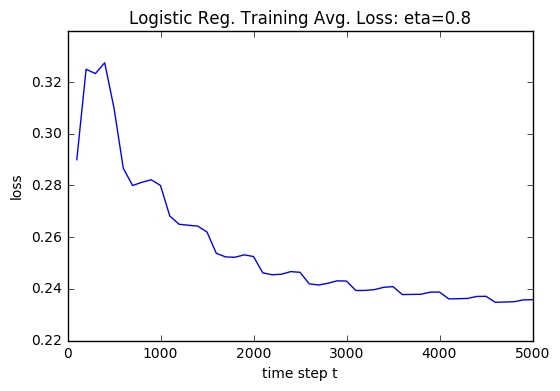

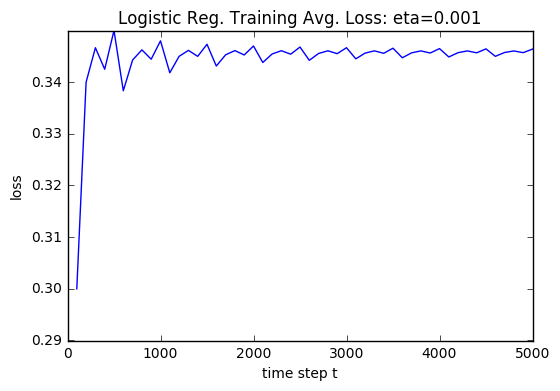

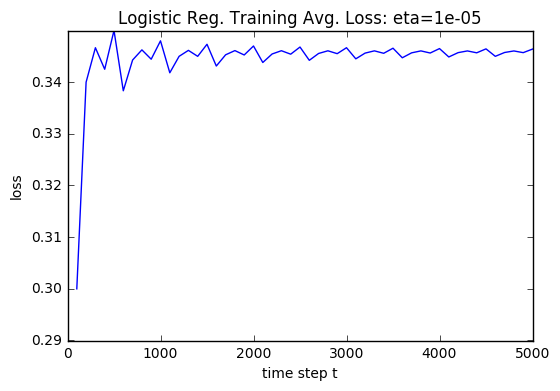

In [3]:
for eta in etas:
    plt.plot(logistic_logs[eta]['train_losses']['x'], logistic_logs[eta]['train_losses']['y'])
    plt.title('Logistic Reg. Training Avg. Loss: eta=' + str(eta))
    plt.xlabel('time step t')
    plt.ylabel('loss')
    plt.show()

### 4.2.b.ii
Report the l2 norm of the weights at the end of the pass. In general, l2 regularization can be useful if the norm of these weights grows very large over the course of model training. In this assignment, however, you are not expected to perform l2 regularization.

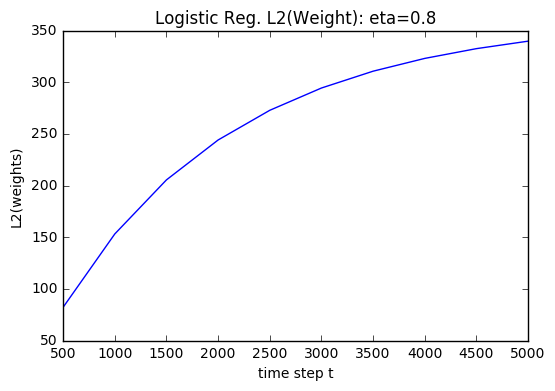

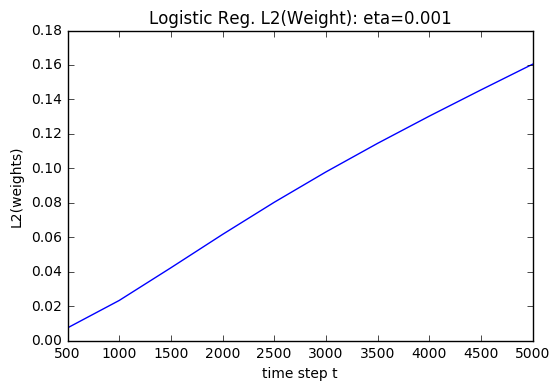

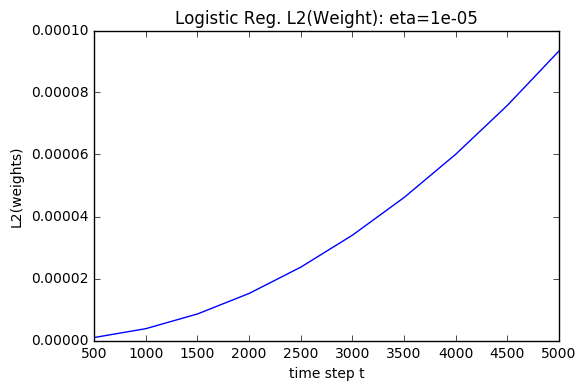

In [4]:
for eta in etas:
    plt.plot(logistic_logs[eta]['l2s']['x'], logistic_logs[eta]['l2s']['y'])
    plt.title('Logistic Reg. L2(Weight): eta=' + str(eta))
    plt.xlabel('time step t')
    plt.ylabel('L2(weights)')
    plt.show()

### 4.2.b.iii
Use the model weights to predict whether each patient in the test set has diabetes, for every 100 steps. Recall that “test label.txt” contains the labels for the test data. Report the SSE (sum of squared errors) of your prediction. Make sure to use the SSE for the 0/1 prediction.

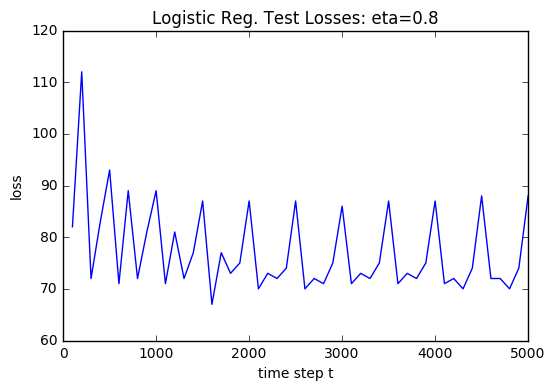

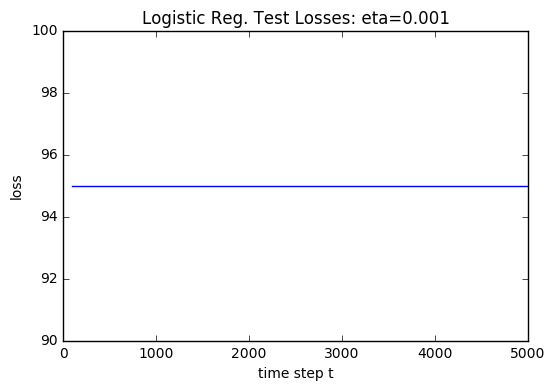

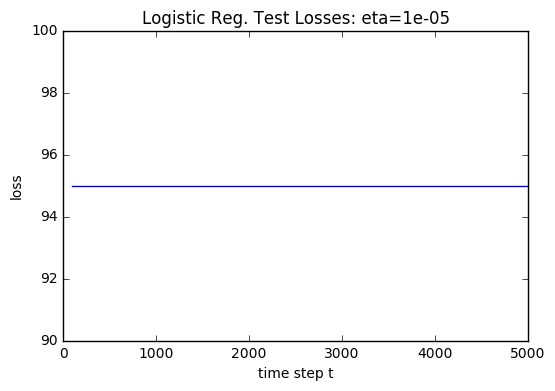

In [5]:
for eta in etas:
    plt.plot(logistic_logs[eta]['test_losses']['x'], logistic_logs[eta]['test_losses']['y'])
    plt.title('Logistic Reg. Test Losses: eta=' + str(eta))
    plt.xlabel('time step t')
    plt.ylabel('loss')
    plt.show()

## Linear Regression

In [6]:
linear_logs = {}
for eta in etas:
    linear_logs[eta] = {}
    train(X, y, np.zeros(D), linear_loss, eta, 10 * N, linear_logs[eta])

### 4.2.b.i
Plot the average loss L as a function of the number of steps T

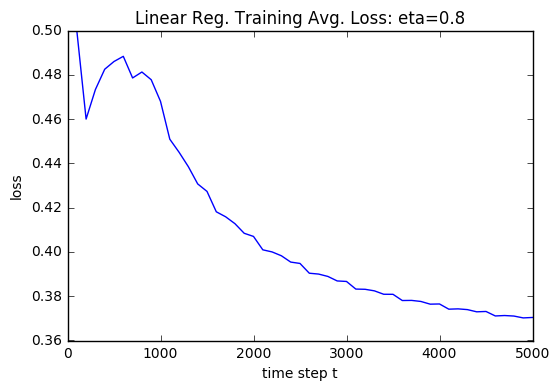

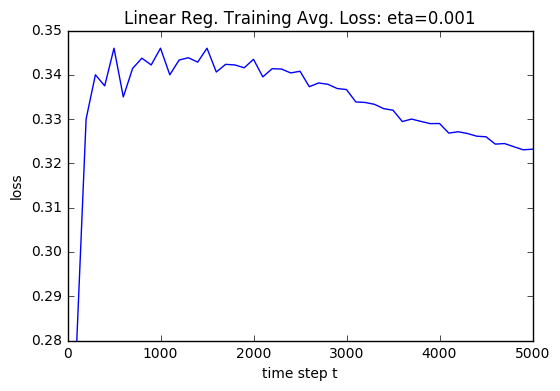

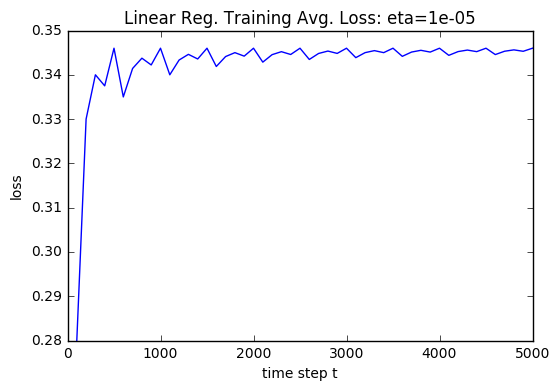

In [7]:
for eta in etas:
    plt.plot(linear_logs[eta]['train_losses']['x'], linear_logs[eta]['train_losses']['y'])
    plt.title('Linear Reg. Training Avg. Loss: eta=' + str(eta))
    plt.xlabel('time step t')
    plt.ylabel('loss')
    plt.show()

### 4.2.b.ii
Report the l2 norm of the weights at the end of the pass. In general, l2 regularization can be useful if the norm of these weights grows very large over the course of model training. In this assignment, however, you are not expected to perform l2 regularization.

In case of et=0.8 the weights overshoot the maximum possible number and end up in infty or nan and thats why the L2 plot is empty

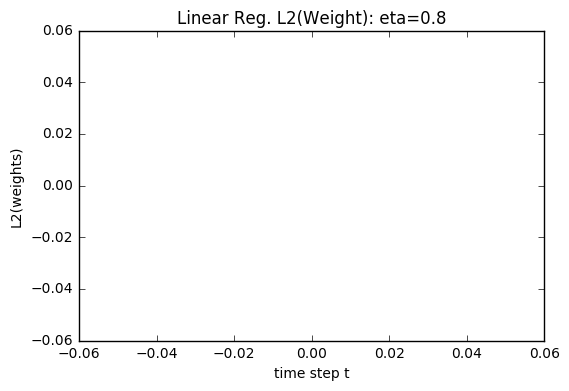

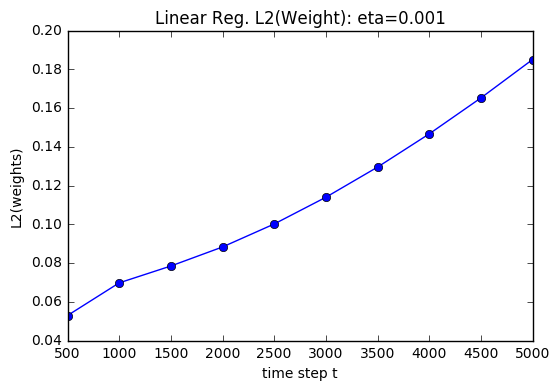

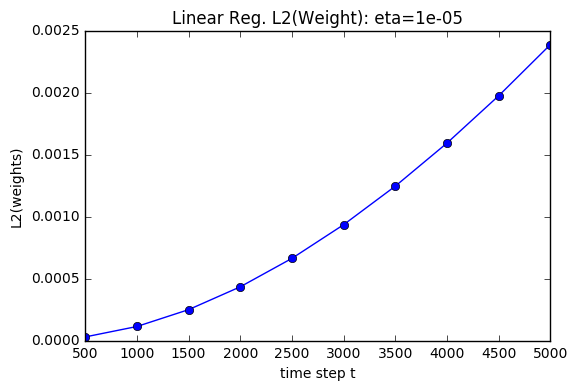

In [8]:
for eta in etas:
    plt.plot(linear_logs[eta]['l2s']['x'], linear_logs[eta]['l2s']['y'], marker='o')
    plt.title('Linear Reg. L2(Weight): eta=' + str(eta))
    plt.xlabel('time step t')
    plt.ylabel('L2(weights)')
    plt.show()

### 4.2.b.iii
Use the model weights to predict whether each patient in the test set has diabetes, for every 100 steps. Recall that “test label.txt” contains the labels for the test data. Report the SSE (sum of squared errors) of your prediction. Make sure to use the SSE for the 0/1 prediction.

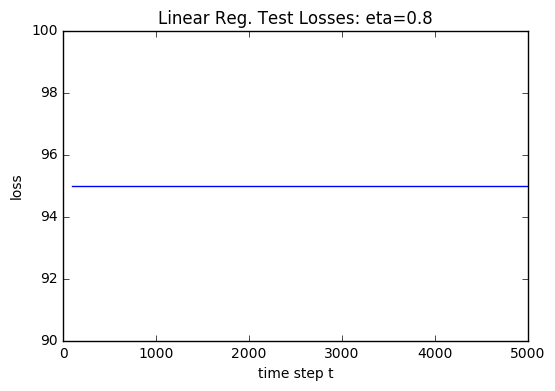

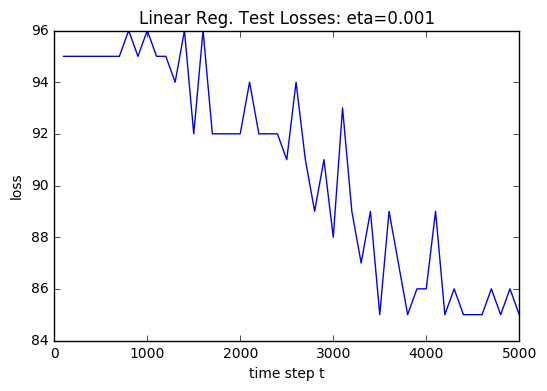

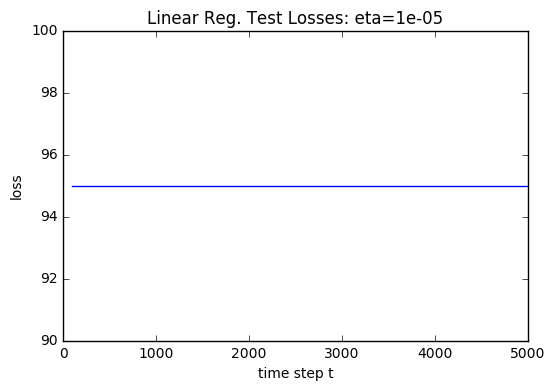

In [9]:
for eta in etas:
    plt.plot(linear_logs[eta]['test_losses']['x'], linear_logs[eta]['test_losses']['y'])
    plt.title('Linear Reg. Test Losses: eta=' + str(eta))
    plt.xlabel('time step t')
    plt.ylabel('loss')
    plt.show()

## Best Logistic Regression Model

In order to find the best logistic regression model, we will train the network for 100,000 steps for all eta values and then take the average of the last **N=500** weights for each eta. Then finally we will eta value which resulted in the least loss and then use the respective weights as our final weights for the model.

In [10]:
logistic_w = {}
logistic_logs = {}
for eta in etas:
    logistic_logs[eta] = {}
    logistic_w[eta] = train(X, y, np.zeros(D), logistic_loss, eta, 100000, logs=logistic_logs[eta])


In [11]:
best_eta = etas[0]
best_loss, _ = logistic_loss(X['train'], y['train'], logistic_w[best_eta])
for eta in etas[1:]:
    loss, _ = logistic_loss(X['train'], y['train'], logistic_w[eta])
    if loss < best_loss:
        best_eta = eta
        best_loss = loss

print 'best eta=' + str(best_eta) + ' with loss=' + str(best_loss)
features_ = np.array(['BMI', 'insulin', 'PGC'])
ids = [np.argmax(features == f) for f in features_]
print str(features_) + " = " + str(logistic_w[best_eta][ids])

best eta=0.8 with loss=107
['BMI' 'insulin' 'PGC'] = [  7.30162095  -0.92481426  11.74163817]


In [12]:
y_ = logistic_loss(X['test'], None, logistic_w[best_eta])
print str(round(100.0 * np.sum(y_ == y['test']) / y['test'].shape[0], 2)) + '% accuracy on test'

72.76% accuracy on test


### Interpretation of The Weights

W['BMI'] = 7.30162095
W['insulin'] = -0.92481426
W['PGC'] = 11.74163817

The above weights for the features BMI, 2-Hour serum insulin level, and Plasma glucose concentration make sense because:
1. A higher BMI suggests higher chances for diabities.
2. Lack of insulin in the body suggests higher changes for diabities
3. A higher Plasma glucose concentration suggests higher changes of diabities.